In [2]:
import csv
import zipfile
import os
import itertools
import matplotlib.pyplot as plt

from pathlib import Path

In [71]:
IMAGES_PATH = Path().resolve().parent / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1- Afficher les deux premières lignes de ce csv. Que représentent elles ?

In [72]:
with open('../data/trees.csv') as file:
    reader = csv.reader(file)
    data = list(reader)

In [73]:
len(data)

31244

In [74]:
with open('../data/trees.csv') as file:
    reader = csv.reader(file)
    for row in reader:
        print(" ".join(row))

ELEM_POINT_ID CODE NOM GENRE GENRE_DESC CATEGORIE CATEGORIE_DESC SOUS_CATEGORIE SOUS_CATEGORIE_DESC CODE_PARENT CODE_PARENT_DESC ADR_SECTEUR BIEN_REFERENCE GENRE_BOTA ESPECE VARIETE STADEDEDEVELOPPEMENT EQUIPE REMARQUES ANNEEDEPLANTATION RAISONDEPLANTATION TRAITEMENTCHENILLES COURRIER IDENTIFIANTPLU TYPEIMPLANTATIONPLU INTITULEPROTECTIONPLU ANNEEABATTAGE ESSOUCHEMENT DIAMETREARBRE CAUSEABATTAGE COLLECTIVITE GeoJSON
37993 ESP37969 ESP37969 VEG VEGETATION ESP01 Arbre ESP065 Arbre d'enceintes fermées ESP37898 Maison des Collines Jard Poisat 6 AR37969                   {"type":"Point","coordinates":[5.76034690089422,45.1543159441061]}
37992 ESP37968 ESP37968 VEG VEGETATION ESP01 Arbre ESP065 Arbre d'enceintes fermées ESP37898 Maison des Collines Jard Poisat 6 AR37968                   {"type":"Point","coordinates":[5.75982646464411,45.154046459904]}
37991 ESP37967 ESP37967 VEG VEGETATION ESP01 Arbre ESP065 Arbre d'enceintes fermées ESP37898 Maison des Collines Jard Poisat 6 AR37967        

In [75]:
with open('../data/trees.csv') as file:
    reader = csv.reader(file)
    interestingrows = [row for idx, row in enumerate(reader) if idx in (1,3)]

print(interestingrows)

[['37993', 'ESP37969', 'ESP37969', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP065', "Arbre d'enceintes fermées", 'ESP37898', 'Maison des Collines Jard Poisat', '6', 'AR37969', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '{"type":"Point","coordinates":[5.76034690089422,45.1543159441061]}'], ['37991', 'ESP37967', 'ESP37967', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP065', "Arbre d'enceintes fermées", 'ESP37898', 'Maison des Collines Jard Poisat', '6', 'AR37967', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '{"type":"Point","coordinates":[5.75998073144869,45.1540202490699]}']]


In [76]:
with open('../data/trees.csv') as file:
    reader = csv.reader(file)
    
    for row in itertools.islice(reader, 2):
        print(row)

['\ufeffELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE', 'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE', 'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE', 'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION', 'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU', 'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE', 'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE', 'GeoJSON']
['37993', 'ESP37969', 'ESP37969', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP065', "Arbre d'enceintes fermées", 'ESP37898', 'Maison des Collines Jard Poisat', '6', 'AR37969', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '{"type":"Point","coordinates":[5.76034690089422,45.1543159441061]}']


In [77]:
with open('../data/trees.csv') as file:
    reader = csv.reader(file)
    
    next(reader)
    
    for row in itertools.islice(reader, 2):
        print(row)

['37993', 'ESP37969', 'ESP37969', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP065', "Arbre d'enceintes fermées", 'ESP37898', 'Maison des Collines Jard Poisat', '6', 'AR37969', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '{"type":"Point","coordinates":[5.76034690089422,45.1543159441061]}']
['37992', 'ESP37968', 'ESP37968', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP065', "Arbre d'enceintes fermées", 'ESP37898', 'Maison des Collines Jard Poisat', '6', 'AR37968', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '{"type":"Point","coordinates":[5.75982646464411,45.154046459904]}']


#### la première ligne est l'en-tête et la deuxième ligne fournit des informations sur chaque colonne pour un identifiant spécifique

## 2- Afficher la 2ème colonne de chacune de ces deux lignes.

In [78]:
with open('../data/trees.csv', "r", newline="") as file:
    reader = csv.reader(file, delimiter=",")
    
    for row in itertools.islice(reader, 3):
        print(row[1])

CODE
ESP37969
ESP37968


#### la 2ème colonne de chacune de ces deux lignes est le codes

## 3- Extraire l’information concernant l’année de plantation pour l’ensemble des lignes (rows) et stocker ces informations dans une autre variable de type List

In [79]:
with open('../data/trees.csv', newline="") as file:

    reader = csv.DictReader(file)
    writer = []

    for row in reader:
        annee = row['ANNEEDEPLANTATION'].split()
        writer.append(annee)

In [80]:
writer

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2000'],
 ['2017'],
 ['2009'],
 ['2009'],
 ['2009'],
 ['1983'],
 ['1983'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['1976'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2017'],
 ['2015'],
 ['2015'],
 ['2015'],
 ['2015'],


'writer' génère une liste de listes. Pour avoir une liste 'flat', nous pouvons utiliser itertools:

In [81]:
list_annees = list(itertools.chain.from_iterable(writer))
list_annees = [ int(x) for x in list_annees]
list_annees

[2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2000,
 2017,
 2009,
 2009,
 2009,
 1983,
 1983,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 2017,
 2017,
 2017,
 2017,
 2015,
 2015,
 2015,
 2015,
 2008,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1966,
 1995,
 1966,
 1966,
 1966,
 1966,
 1966,
 1970,
 2006,
 1970,
 1970,
 2009,
 1970,
 1970,
 1970,
 2009,
 1970,
 1970,
 2006,
 2006,
 1970,
 2009,
 1970,
 2009,
 1970,
 2006,
 1970,
 1970,
 2011,
 1970,
 1970,
 1970,

In [82]:
len(list_annees)

30801

## 4- Afficher les 50 premières lignes et les 50 dernières lignes de cette liste.

#### les 50 premières:

In [83]:
list_annees[:50]

[2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017]

In [84]:
list_annees[-50:]

[1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 2017,
 2017,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001]

## 5- Combien d’arbres sont recensés dans ce jeu de données?

Si nous examinons l'ensemble de données complet, il suffit de regarder le nombre total de lignes :

In [85]:
len(data)

31244

il y a 31243 (31244 - 1 car une entrée concerne l'en-tête) arbres enregistrés dans cet jeu de données

## 6- Pour combien d’arbres manque-t-il l’information concernant la date de plantation?

In [86]:
len(data) - len(list_annees)

443

ou

In [87]:
empty_line_count = 0 

with open('../data/trees.csv', newline="") as file:

    reader = csv.DictReader(file)

    for row in reader:
      # The split method will split the word into list. if the line is
      # empty the split will return an empty list. ' == [] ' this will
      # check the list is empty or not.

       if row['ANNEEDEPLANTATION'].split() == []:
            empty_line_count += 1

print(f'Empty Line Count: {empty_line_count}')

Empty Line Count: 442


les deux résultats sont les mêmes :

len(data) - len(list_annees) = 443 car dans "data" nous comptons l'en-tête, ce qui nous donne une ligne supplémentaire

## 7- Combien d’arbres ont été plantés l’année de votre naissance?

In [88]:
list_annees.count(1992)

226

226 arbres ont été plantés l'année de ma naissance

## 8- Quelle est la plus ancienne année de plantation recensée dans ce dataset? La plus récente?

La plus récente:

In [89]:
max(list_annees)

2017

La plus ancienne:

In [90]:
min(list_annees)

1950

## 9- Combien d’arbres ont été plantés année par année (ex : 1987 : 771, 1988 : 266, etc...)?

Nous pouvons utiliser la fonction Counter:

In [91]:
from collections import Counter

In [92]:
Counter(list_annees)

Counter({1975: 3922,
         2001: 1626,
         1980: 1528,
         1970: 1444,
         2015: 996,
         1985: 990,
         1976: 972,
         1978: 912,
         2014: 881,
         1995: 781,
         1987: 771,
         1965: 760,
         1960: 745,
         2009: 696,
         1984: 666,
         1981: 644,
         2006: 616,
         1977: 616,
         1999: 603,
         2011: 530,
         2010: 467,
         2000: 461,
         2005: 450,
         1982: 448,
         1990: 433,
         1950: 422,
         1996: 385,
         1972: 364,
         1979: 361,
         2004: 352,
         2003: 352,
         1974: 350,
         1969: 350,
         2016: 347,
         2002: 341,
         2012: 338,
         2013: 335,
         1983: 333,
         1989: 307,
         1994: 288,
         2017: 272,
         1988: 266,
         1986: 238,
         1997: 238,
         1992: 226,
         1998: 220,
         2008: 219,
         1993: 161,
         2007: 155,
         1991: 1

## 10- Combien d’arbres ont été plantés en moyenne chaque année?

In [93]:
counter_annees = Counter(list_annees)
len(counter_annees) # est le nombre d'années pour lesquelles les données sont disponibles

58

In [94]:
len(data) - 1 # est le nombre total d'arbres qui ont été plantés

31243

In [95]:
average = (len(data) - 1) / len(counter_annees)
average

538.6724137931035

En moyenne, 538 arbres ont été plantés chaque année

## 11- Stocker conjointement l’année de plantation et le nombre d’arbres plantés dans un tuple. Les tuples seront stockés dans une liste (ex : [ (‘1987’, 771), (‘1988’, 266), ..... ] )

In [96]:
counter_annees = Counter(list_annees)
dict_anees = dict(counter_annees)

In [97]:
tuple_annees = [(k, v) for k, v in dict_anees.items()]
#tuple_annees = tuple(tuple_annees)
print(tuple_annees)

[(2017, 272), (2000, 461), (2009, 696), (1983, 333), (1976, 972), (2015, 996), (2008, 219), (1966, 95), (1995, 781), (1970, 1444), (2006, 616), (2011, 530), (2007, 155), (2002, 341), (1981, 644), (1974, 350), (1986, 238), (2014, 881), (1975, 3922), (2012, 338), (1980, 1528), (2004, 352), (1965, 760), (1979, 361), (1999, 603), (2013, 335), (2010, 467), (1991, 146), (1996, 385), (2001, 1626), (1990, 433), (1978, 912), (1984, 666), (1961, 27), (1989, 307), (1998, 220), (1982, 448), (1987, 771), (1997, 238), (2016, 347), (1988, 266), (1994, 288), (1993, 161), (1992, 226), (2003, 352), (1985, 990), (2005, 450), (1969, 350), (1968, 116), (1950, 422), (1972, 364), (1977, 616), (1960, 745), (1967, 57), (1955, 66), (1964, 7), (1971, 75), (1973, 34)]


## 12 - Quel Maire a planté le plus d’arbres à Grenoble?

la source de données: https://www.annuaire-mairie.fr/ancien-maire-grenoble.html

In [29]:
dict_maire = {
    'Depuis 2014': 'M. Eric PIOLLE',
    'De 1995 à 2014': 'M. Michel DESTOT',
    'De 1983 à 1995': 'M. Alain CARIGNON',
    'De mars 1965 à 1983': 'M. Hubert DUBEDOUT',
    'De 1959 à mars 1965': 'M. Albert MICHALLON',
    'Du 23 janvier 1949 à 1959': 'M. Léon MARTIN'
    }

Enregistrer le dictionnaire 'list_annees' sous forme de fichier csv appelé "arbres_annees.csv":

In [98]:
counter_annees = Counter(list_annees)
dict_anees = dict(counter_annees)

In [99]:
with open('../data/arbres_annees.csv', 'w') as csv_file:

    writer = csv.writer(csv_file)

    for key, value in dict_anees.items():
       writer.writerow([key, value])

Créer un nouveau fichier csv "arbres_annees_maire.csv" contenant le nombre d'arbres plantés par an et le maire de Grenoble cette année-là:

In [101]:
#csv_data = csv.reader(open('../data/arbres_anees.csv', 'r'))
csv_new = csv.writer(open('../data/arbres_annees_maire.csv', 'w'))

with (open('../data/arbres_annees.csv', 'r', newline='')) as file:

    reader = csv.reader(file, delimiter=',')
    rows = [[int(row[0]), int(row[1])] for row in reader if row]

for row in rows:

        if row[0] >= 2014:
            row.append('M. Eric PIOLLE')
            csv_new.writerow(row)
        elif 1995 <= row[0] < 2014:
            row.append('M. Michel DESTOT')
            csv_new.writerow(row)
        elif 1983 <= row[0] < 1995:
            row.append('M. Alain CARIGNON')
            csv_new.writerow(row)
        elif 1965 <= row[0] < 1983:
            row.append('M. Hubert DUBEDOUT')
            csv_new.writerow(row)
        elif 1959 <= row[0] < 1965:
            row.append('M. Albert MICHALLON')
            csv_new.writerow(row)
        else:
            row.append('M. Léon MARTIN')
            csv_new.writerow(row)

Additionner le nombre d'arbres plantés par an...

In [103]:
sum1 = 0
sum2 = 0
sum3 = 0
sum4 = 0
sum5 = 0
sum6 = 0

with (open('../data/arbres_annees.csv', 'r', newline='')) as file:

    reader = csv.reader(file, delimiter=',')
    rows = [[int(row[0]), int(row[1])] for row in reader if row]

for row in rows:

        if row[0] >= 2014:
            sum1 += row[1]
        elif 1995 <= row[0] < 2014:
            sum2 += row[1]
        elif 1983 <= row[0] < 1995:
            sum3 += row[1]
        elif 1965 <= row[0] < 1983:
            sum4 += row[1]
        elif 1959 <= row[0] < 1965:
            sum5 += row[1]
        else:
            sum6 += row[1]   

...et utiliser ces informations pour créer un dictionnaire contenant le nombre d'arbres plantés par le maire:

In [104]:
dict_arbre_per_maire = {
    'M. Eric PIOLLE': sum1,
    'M. Michel DESTOT': sum2,
    'M. Alain CARIGNON': sum3,
    'M. Hubert DUBEDOUT': sum4,
    'M. Albert MICHALLON': sum5,
    'M. Léon MARTIN': sum6 
    }

dict_arbre_per_maire

{'M. Eric PIOLLE': 2496,
 'M. Michel DESTOT': 9165,
 'M. Alain CARIGNON': 4825,
 'M. Hubert DUBEDOUT': 13048,
 'M. Albert MICHALLON': 779,
 'M. Léon MARTIN': 488}

Enregistrer le dictionnaire 'dict_arbre_per_maire' sous forme de fichier csv appelé "total_arbres_per_maire.csv":

In [105]:
with open('../data/total_arbres_per_maire.csv', 'w', newline='') as csv_file:

    header = ['Maire', 'arbres_plantés']

    writer = csv.DictWriter(csv_file, fieldnames=header)

    writer.writeheader()

    for key in dict_arbre_per_maire:
        writer.writerow({'Maire': key, 'arbres_plantés': dict_arbre_per_maire[key]})

D'après le dictionnaire 'dict_arbre_per_maire' on voit que le maire qui a planté le plus d'arbres était Hubert Dubedout.

## 13- Récupérez maintenant l’information concernant le genre botanique et la stocker conjointement avec l’année de plantation dans un tuple. Les tuples seront stockés dans une liste (ex : [ (‘1987’, ‘Acer), (‘1988’, ‘Acerifolia), ..... ])

In [106]:
genre_bota_annee = []

with open('../data/trees.csv', newline="") as file:

    reader = csv.DictReader(file, delimiter=",")
    
    for row in reader:
        genre_bota_annee.append([row["ANNEEDEPLANTATION"], row["GENRE_BOTA"]])

genre_bota_annee

[['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['2017', ''],
 ['2017', ''],
 ['2017', ''],
 ['2017', ''],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', ''],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', ''],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', ''],
 ['2017', ''],
 ['2017', ''],
 ['2017', ''],
 ['2017', ''],
 ['2017', ''],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 'Platanus'],
 ['2017', 

In [107]:
dict_genre_bota = dict(genre_bota_annee)

tuple_genre_bota = [(k, v) for k, v in dict_genre_bota.items()]
#tuple_genre_bota = tuple(tuple_genre_bota)
print(tuple_genre_bota)

[('', ''), ('2017', 'Fraxinus'), ('2000', 'Prunus'), ('2009', 'Liriodendron'), ('1983', 'Platanus'), ('1976', 'Fagus'), ('2015', 'Liquidambar'), ('2008', 'Tilia'), ('1966', 'Alnus'), ('1995', 'Prunus'), ('1970', 'Platanus'), ('2006', 'Fraxinus'), ('2011', 'Liquidambar'), ('2007', 'Sophora'), ('2002', 'Prunus'), ('1981', 'Populus'), ('1974', 'Platanus'), ('1986', 'Sophora'), ('2014', 'Fraxinus'), ('1975', 'Salix'), ('2012', 'Quercus'), ('1980', 'Platanus'), ('2004', 'Liriodendron'), ('1965', 'Platanus'), ('1979', 'Carpinus'), ('1999', 'Corylus'), ('2013', 'Fraxinus'), ('2010', 'Tilia'), ('1991', 'Gleditsia'), ('1996', 'Tilia'), ('2001', 'Fraxinus'), ('1990', 'Salix'), ('1978', 'Acer'), ('1984', 'Tilia'), ('1961', 'Populus'), ('1989', 'Sophora'), ('1998', 'Pyrus'), ('1982', 'Prunus'), ('1987', 'Betula'), ('1997', 'Quercus'), ('2016', 'Acer'), ('1988', 'Acer'), ('1994', 'Prunus'), ('1993', 'Ulmus'), ('1992', 'Liquidambar'), ('2003', 'Pterocarya'), ('1985', 'Populus'), ('2005', 'Prunus'), 

## 14- Pour combien d'arbres manque-t-il l’information concernant le genre botanique?

In [108]:
list_genre_bota = []

with open('../data/trees.csv', newline="") as file:

    reader = csv.DictReader(file, delimiter=",")
    
    for row in reader:
        genre_bota = row["GENRE_BOTA"].split()
        list_genre_bota.append(genre_bota)

list_genre_bota = list(itertools.chain.from_iterable(list_genre_bota))

len(data) - len(list_genre_bota)

516

In [109]:
empty_line_count = 0 

with open('../data/trees.csv', newline="") as file:

    reader = csv.DictReader(file)

    for row in reader:

       if row['GENRE_BOTA'].split() == []:
            empty_line_count += 1

print(f'Empty Line Count: {empty_line_count}')

Empty Line Count: 515


## 15- Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année.

In [110]:
counter_annees = Counter(list_annees)
dict_anees = dict(counter_annees)

sorted_dict = dict(sorted(dict_anees.items()))

<BarContainer object of 58 artists>

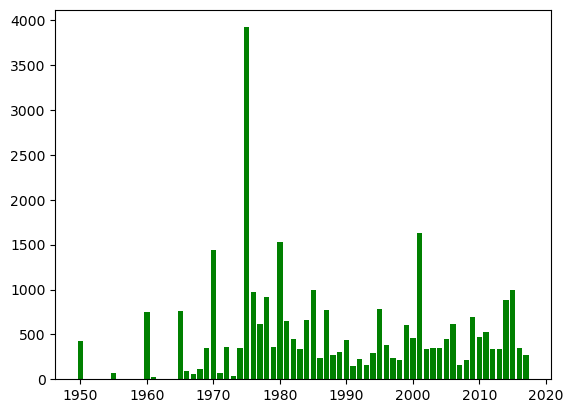

In [111]:
plt.bar(sorted_dict.keys(), sorted_dict.values(), color='g')

## 16- (plus dur) Triez les tuples (année, genre_botanique) en fonction de l’année de plantation par ordre décroissant.

In [112]:
bota_genre_annee = []

with open('../data/trees.csv', newline="") as file:

    reader = csv.DictReader(file, delimiter=",")
    next(reader)

    for row in reader:
        bota_genre_annee.append([row["ANNEEDEPLANTATION"], row["GENRE_BOTA"]])

bota_genre_annee

genre_bota_dict = dict(bota_genre_annee)

genre_bota_dict = dict(reversed(sorted(genre_bota_dict.items())))
genre_bota_dict

{'2017': 'Fraxinus',
 '2016': 'Acer',
 '2015': 'Liquidambar',
 '2014': 'Fraxinus',
 '2013': 'Fraxinus',
 '2012': 'Quercus',
 '2011': 'Liquidambar',
 '2010': 'Tilia',
 '2009': 'Liriodendron',
 '2008': 'Tilia',
 '2007': 'Sophora',
 '2006': 'Fraxinus',
 '2005': 'Prunus',
 '2004': 'Liriodendron',
 '2003': 'Pterocarya',
 '2002': 'Prunus',
 '2001': 'Fraxinus',
 '2000': 'Prunus',
 '1999': 'Corylus',
 '1998': 'Pyrus',
 '1997': 'Quercus',
 '1996': 'Tilia',
 '1995': 'Prunus',
 '1994': 'Prunus',
 '1993': 'Ulmus',
 '1992': 'Liquidambar',
 '1991': 'Gleditsia',
 '1990': 'Salix',
 '1989': 'Sophora',
 '1988': 'Acer',
 '1987': 'Betula',
 '1986': 'Sophora',
 '1985': 'Populus',
 '1984': 'Tilia',
 '1983': 'Platanus',
 '1982': 'Prunus',
 '1981': 'Populus',
 '1980': 'Platanus',
 '1979': 'Carpinus',
 '1978': 'Acer',
 '1977': 'Alnus',
 '1976': 'Fagus',
 '1975': 'Salix',
 '1974': 'Platanus',
 '1973': 'Acer',
 '1972': 'Populus',
 '1971': 'Platanus',
 '1970': 'Platanus',
 '1969': 'Betula',
 '1968': 'Platanus',
 